In [2]:
library(ggplot2)
library(ggExtra)
library(tidyverse)

Adatok forrása: https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018

In [3]:
data <- read.csv('NFA_2018.csv')

In [4]:
(max_year <- max(data$year))

[1] 2014

In [5]:
(data_top <- data %>%
    filter(year == max_year, record == 'EFConsTotGHA', ISO.alpha.3.code != '') %>%
    select(country, country_code=ISO.alpha.3.code, carbon) %>%
    arrange(desc(carbon)) %>%
    slice(1:10))

country,country_code,carbon
<fct>,<fct>,<dbl>
China,CHN,3613649156
United States of America,USA,1909487412
India,IND,754372670
Russian Federation,RUS,513143806
Japan,JPN,446802002
Germany,DEU,261418953
"Korea, Republic of",KOR,211253067
"Iran, Islamic Republic of",IRN,193957909
United Kingdom,GBR,192751281


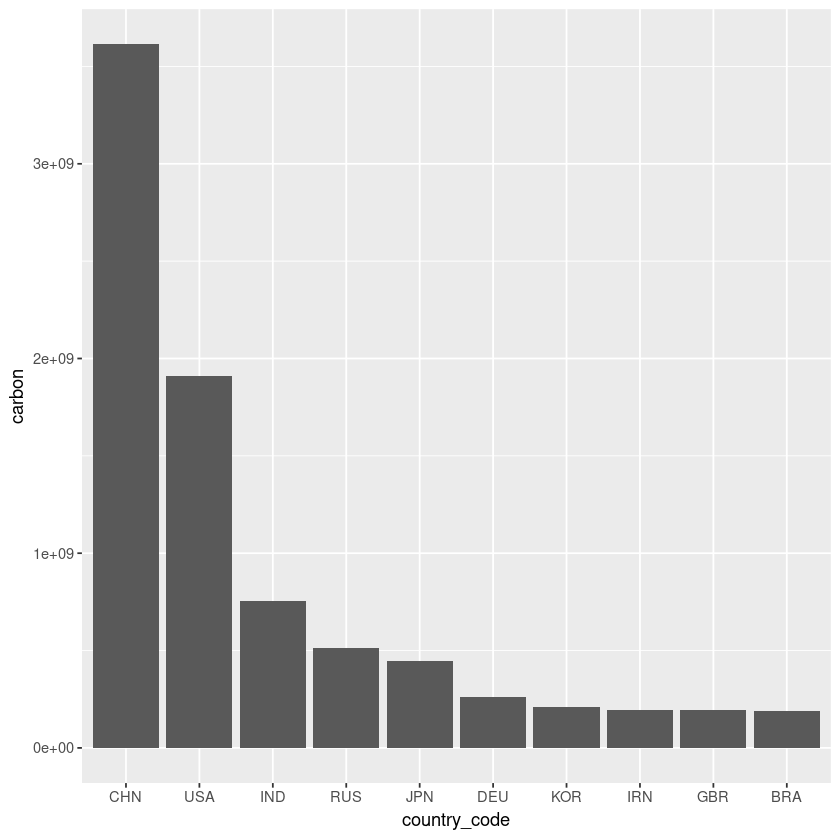

In [6]:
data_top$country_code <- factor(data_top$country_code, levels=data_top$country_code[order(data_top$carbon, decreasing=TRUE)])
ggplot(data=data_top, aes(country_code, carbon)) +
    geom_col()

In [7]:
data_percap <- data %>%
    filter(year == 2010, record == 'EFConsPerCap', ISO.alpha.3.code != '') %>%
    select(carbon, gdp=Percapita.GDP..2010.USD.)

Warning message:
“Removed 52 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 52 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 52 rows containing missing values (geom_point).”

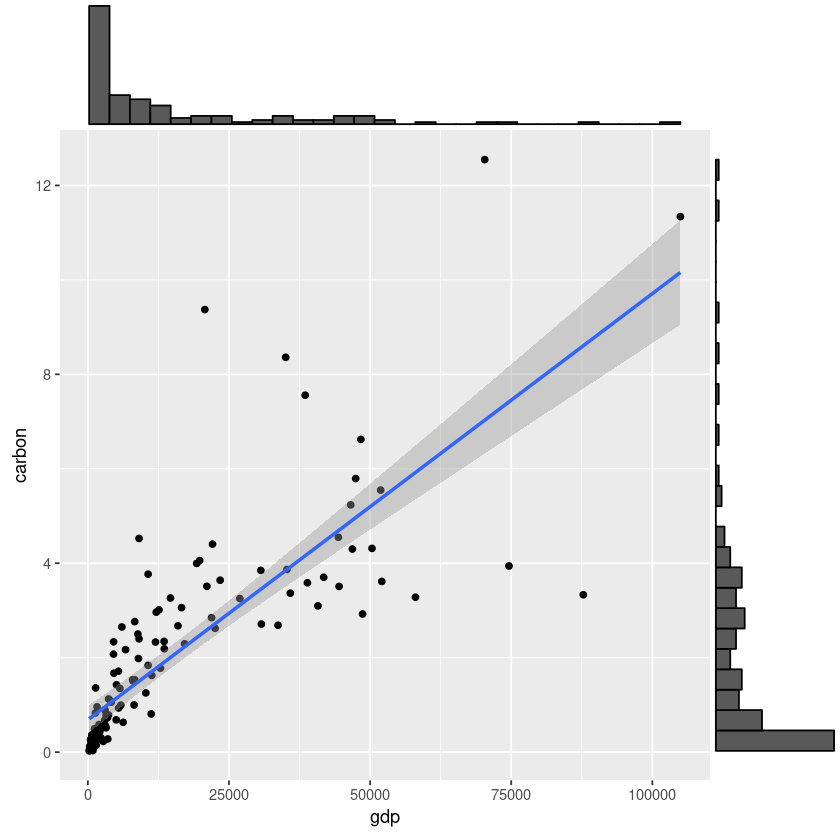

In [8]:
plot_center = ggplot(data_percap, aes(x=gdp, y=carbon)) + 
    geom_point() +
    geom_smooth(method='lm')
ggMarginal(plot_center, type='histogram')